In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# define functions

def createRealWavelet(time,freq,fwhm,):
  sinepart = np.cos(2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
  return sinepart*gauspart

(0.0, 20.0)

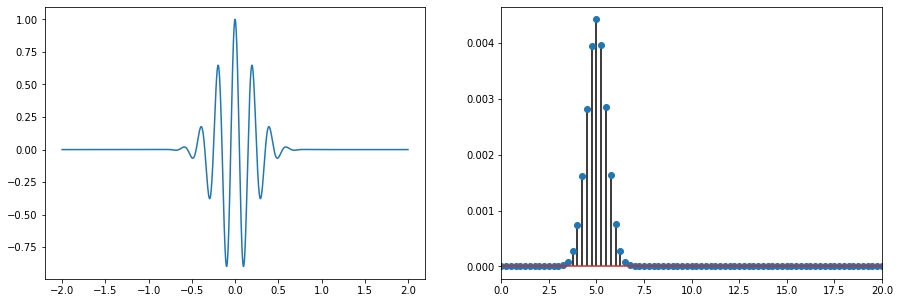

In [7]:
# parameters
freq = 5
fwhm = .5
srate = 500
time = np.arange(-2*srate,2*srate+1/srate)/srate
npnts = len(time)

# create wavelet
wavelet = createRealWavelet(time,freq,fwhm)

# get powersepctrum

waveletX = np.abs(np.fft.fft(wavelet/npnts))**2
hz = np.linspace(0,srate/2,int(npnts/2+1))

fig,ax = plt.subplots(1,2 ,figsize=(15,5))

ax[0].plot(time,wavelet)
ax[1].stem(hz,waveletX[:len(hz)],'k',use_line_collection = True)
ax[1].set_xlim([0,20])

In [10]:
def createcomplexWavelet(time,freq,fwhm,):
  sinepart = np.exp(1j*2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
  return sinepart*gauspart

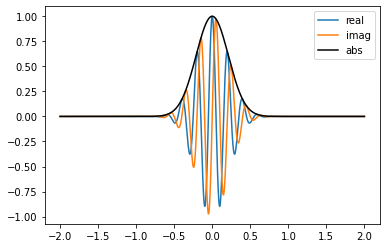

In [13]:
wavelet = createcomplexWavelet(time,freq,fwhm)
plt.plot(time,np.real(wavelet),label = 'real')
plt.plot(time,np.imag(wavelet),label = 'imag')
plt.plot(time,np.abs(wavelet),'k', label = 'abs')
plt.legend()

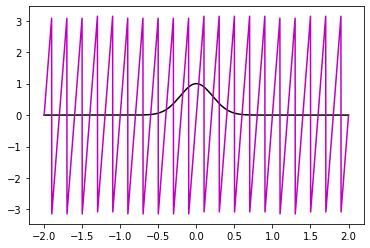

In [15]:
plt.plot(time,np.abs(wavelet),'k', label = 'abs')
plt.plot(time,np.angle(wavelet),'m')

In [20]:
# define parameters
lowfreq = 2
hifreq  = 80
numfrex = 42

frex = np.linspace(lowfreq,hifreq,numfrex)
fwhms = np.linspace(1,1,numfrex)

Text(0.5, 1.0, 'Magnitude')

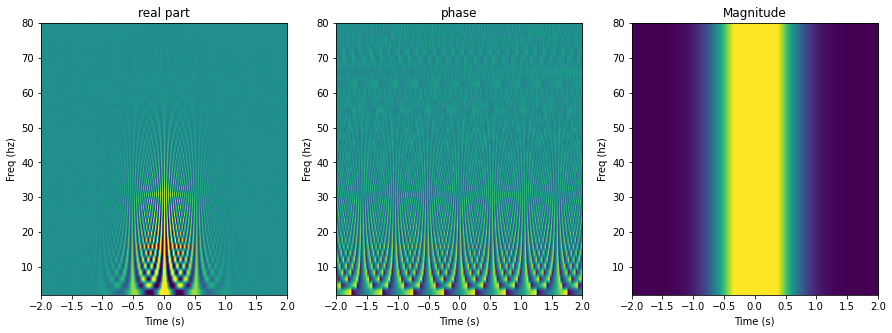

In [29]:
# initialize wavelet family
waveletfam = np.zeros((numfrex,npnts),dtype = 'complex')
for wi in range(numfrex):
  waveletfam[wi,:] = createcomplexWavelet(time,frex[wi],fwhms[wi])

fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(np.real(waveletfam),aspect = 'auto',origin = 'lower',extent = [time[0],time[-1],lowfreq,hifreq],vmin = -.7,vmax = .7)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Freq (hz)')
ax[0].set_title('real part')

ax[1].imshow(np.angle(waveletfam),aspect = 'auto',origin = 'lower',extent = [time[0],time[-1],lowfreq,hifreq],vmin = -3,vmax = 3)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Freq (hz)')
ax[1].set_title('phase')

ax[2].imshow(np.abs(waveletfam),aspect = 'auto',origin = 'lower',extent = [time[0],time[-1],lowfreq,hifreq],vmin = 0,vmax = .7)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Freq (hz)')
ax[2].set_title('Magnitude')

In [32]:
# import the data to python
from scipy.io import loadmat
EEG = loadmat('sampleEEGdata.mat')

# extract the necessary information
# note: Python importing of MATLAB structures is weird and confusing.
# The code below takes care of the extraction.
times = np.squeeze(EEG['EEG'][0][0][14])
data  = EEG['EEG'][0][0][15]
fs    = EEG['EEG'][0][0][11][0][0].astype(int) # sampling rate

print(fs)
print(np.shape(data))

256
(64, 640, 99)


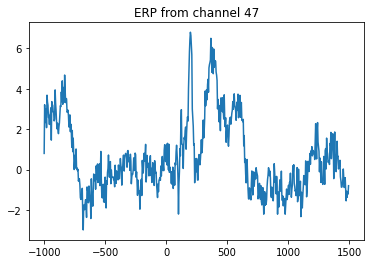

In [40]:
# create event related potential

erp = np.mean(data[46,:,:],axis = 1)

plt.plot(times,erp)
plt.title('ERP from channel 47');


In [41]:
# define parameters
lowfreq = 2
hifreq  = 30
numfrex = 42
time = np.arange(-fs,fs+1)/fs

frex = np.linspace(lowfreq,hifreq,numfrex)
fwhms = np.linspace(1,.5,numfrex)

# initialize wavelet family
waveletfam = np.zeros((numfrex,len(time)),dtype = 'complex')
for wi in range(numfrex):
  waveletfam[wi,:] = createcomplexWavelet(time,frex[wi],fwhms[wi])



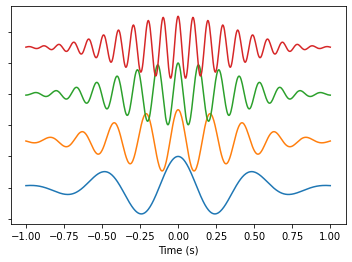

In [48]:
#plot selected wavelets

for i in range(4):
  plt.plot(time,np.real(waveletfam[i*4,:])+i*1.5)
plt.xlabel('Time (s)')
plt.tick_params(labelleft = False)

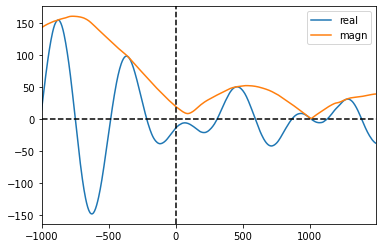

In [60]:
# convolution

convres = np.convolve(erp,waveletfam[0,:],mode = 'same')
plt.plot(times,np.real(convres),label = 'real')
plt.plot(times,np.abs(convres),label = 'magn')
plt.plot([times[0],times[-1]],[0,0],'k--')
ylim = plt.ylim()
plt.xlim([times[0],times[-1]])
plt.ylim(ylim)
plt.plot([0,0],ylim,'k--')
plt.legend()

Text(0, 0.5, 'Freq (hz)')

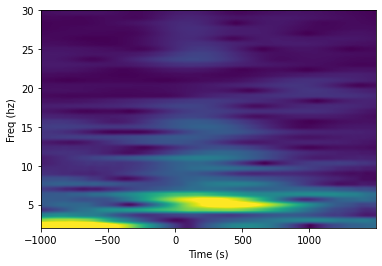

In [67]:
# init matrix
tf = np.zeros((numfrex,len(times)))
# loop ober freq to implement convolution
for wi in range(numfrex):
  convres = np.convolve(erp,waveletfam[wi,:],mode = 'same')
  tf[wi,:] = np.abs(convres)
# create the image
plt.imshow(tf,origin = 'lower',aspect = 'auto',vmax = 110 ,extent = [times[0],times[-1],lowfreq,hifreq])
plt.xlabel('Time (s)')
plt.ylabel('Freq (hz)')